In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats.distributions as dist
import nltk
from collections import defaultdict
from nltk.util import trigrams
import seaborn as sns
import pandas as pd
nltk.download(['punkt', 'averaged_perceptron_tagger', 'universal_tagset'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
#read in data

ai_file = open('/content/drive/MyDrive/CompLingFinalProject/complete_eli5_chatgpt_responses_cleaned.txt')
ai_data = ai_file.readlines()
ai_file.close()

human_file = open('/content/drive/MyDrive/CompLingFinalProject/complete_true_eli5_chatgpt_responses.txt')
human_data = human_file.readlines()
human_file.close  

<function TextIOWrapper.close()>

In [ ]:
ai_data = [l.strip() for l in ai_data] #load data and remove start and end lines
human_data = [l.strip() for l in human_data]

In [ ]:
#create tagged sets

ai_tagged_penn = [nltk.pos_tag(nltk.word_tokenize(l)) for l in ai_data]
human_tagged_penn = [nltk.pos_tag(nltk.word_tokenize(l)) for l in human_data]
ai_tagged_univ = [nltk.pos_tag(nltk.word_tokenize(l), tagset='universal') for l in ai_data]
human_tagged_univ = [nltk.pos_tag(nltk.word_tokenize(l), tagset='universal') for l in human_data]

In [ ]:
def flatten(lst):
  return [elt for sl in lst for elt in sl]

In [ ]:
#unused
def fd_graph_two_lists(l1, l2, title="", xlbl="", ylbl="", l1lbl="", l2lbl=""):
  l1fd = nltk.FreqDist(l1)
  l2fd = nltk.FreqDist(l2)



  fd1sort = sorted(l1fd.items(), key=lambda i: i[1], reverse=True) #prepare data to be graphed
  x_1 = [i+1 for i in range(0, len(fd1sort))]
  y_1 = [b for (a,b) in fd1sort]

  fd2sort = sorted(l2fd.items(), key=lambda i: i[1], reverse=True) #prepare data to be graphed
  x_2 = [i+1 for i in range(0, len(fd2sort))]
  y_2 = [b for (a,b) in fd2sort]

  print(fd1sort)

  # fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, tight_layout=False) #plot, with two adjacent plots

  fig, ax = plt.subplots(1,1)
  fig.suptitle(title)

  ax.loglog(x_1, y_1, label=l1lbl)
  ax.loglog(x_2, y_2, label=l2lbl)
  ax.set_ylabel(ylbl,fontsize=12)
  ax.set_xlabel(xlbl,fontsize=12)
  ax.legend()
  # ax.set_title("Frequency of English Words")
  ax.grid(True)



In [ ]:
#create flatten list of all tags, removing punctuation

rmv_list = [".", ",", "$", "''", "``", ")", "(", ":", "#"]
ai_just_tags_penn = [b for (a,b) in flatten(ai_tagged_penn) if b not in rmv_list]
human_just_tags_penn = [b for (a,b) in flatten(human_tagged_penn) if b not in rmv_list]

ai_just_tags_universal = [b for (a,b) in flatten(ai_tagged_univ) if b not in rmv_list]
human_just_tags_universal = [b for (a,b) in flatten(human_tagged_univ) if b not in rmv_list]

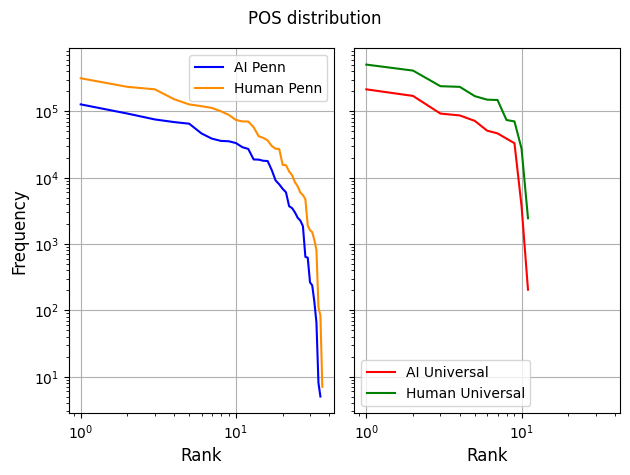

In [ ]:
#Graph POS frequencies

aip = nltk.FreqDist(ai_just_tags_penn)
hp = nltk.FreqDist(human_just_tags_penn)

aiu = nltk.FreqDist(ai_just_tags_universal)
hu = nltk.FreqDist(human_just_tags_universal)

data = [aip, hp, aiu, hu]
plot = []

for s in data:
  sort = sorted(s.items(), key=lambda i: i[1], reverse=True)
  x_1 = [i+1 for i in range(0, len(sort))]
  y_1 = [b for (a,b) in sort]
  plot.append(tuple([x_1, y_1]))

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, tight_layout=False) #plot, with two adjacent plots
fig.suptitle("POS distribution")

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['b', 'darkorange'])
ax1.set_prop_cycle(plt.rcParams['axes.prop_cycle'])

ax1.loglog(plot[0][0], plot[0][1], label="AI Penn")
ax1.loglog(plot[1][0], plot[1][1], label="Human Penn")
ax1.set_ylabel("Frequency",fontsize=12)
ax1.set_xlabel("Rank",fontsize=12)
ax1.legend()
# ax.set_title("Frequency of English Words")
ax1.grid(True)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['r', 'g'])
ax2.set_prop_cycle(plt.rcParams['axes.prop_cycle'])

ax2.loglog(plot[2][0], plot[2][1], label="AI Universal")
ax2.loglog(plot[3][0], plot[3][1], label="Human Universal")
ax2.grid(True)
ax2.set_xlabel("Rank",fontsize=12)
ax2.legend()

So clearly with both of these POS types we have all about the same relative frequency and decay of types/relative frequencies, the question is is the order different, are some more common than others?

Relative percentage of each POS as a histogram

Text(0, 0.5, 'Frequency')

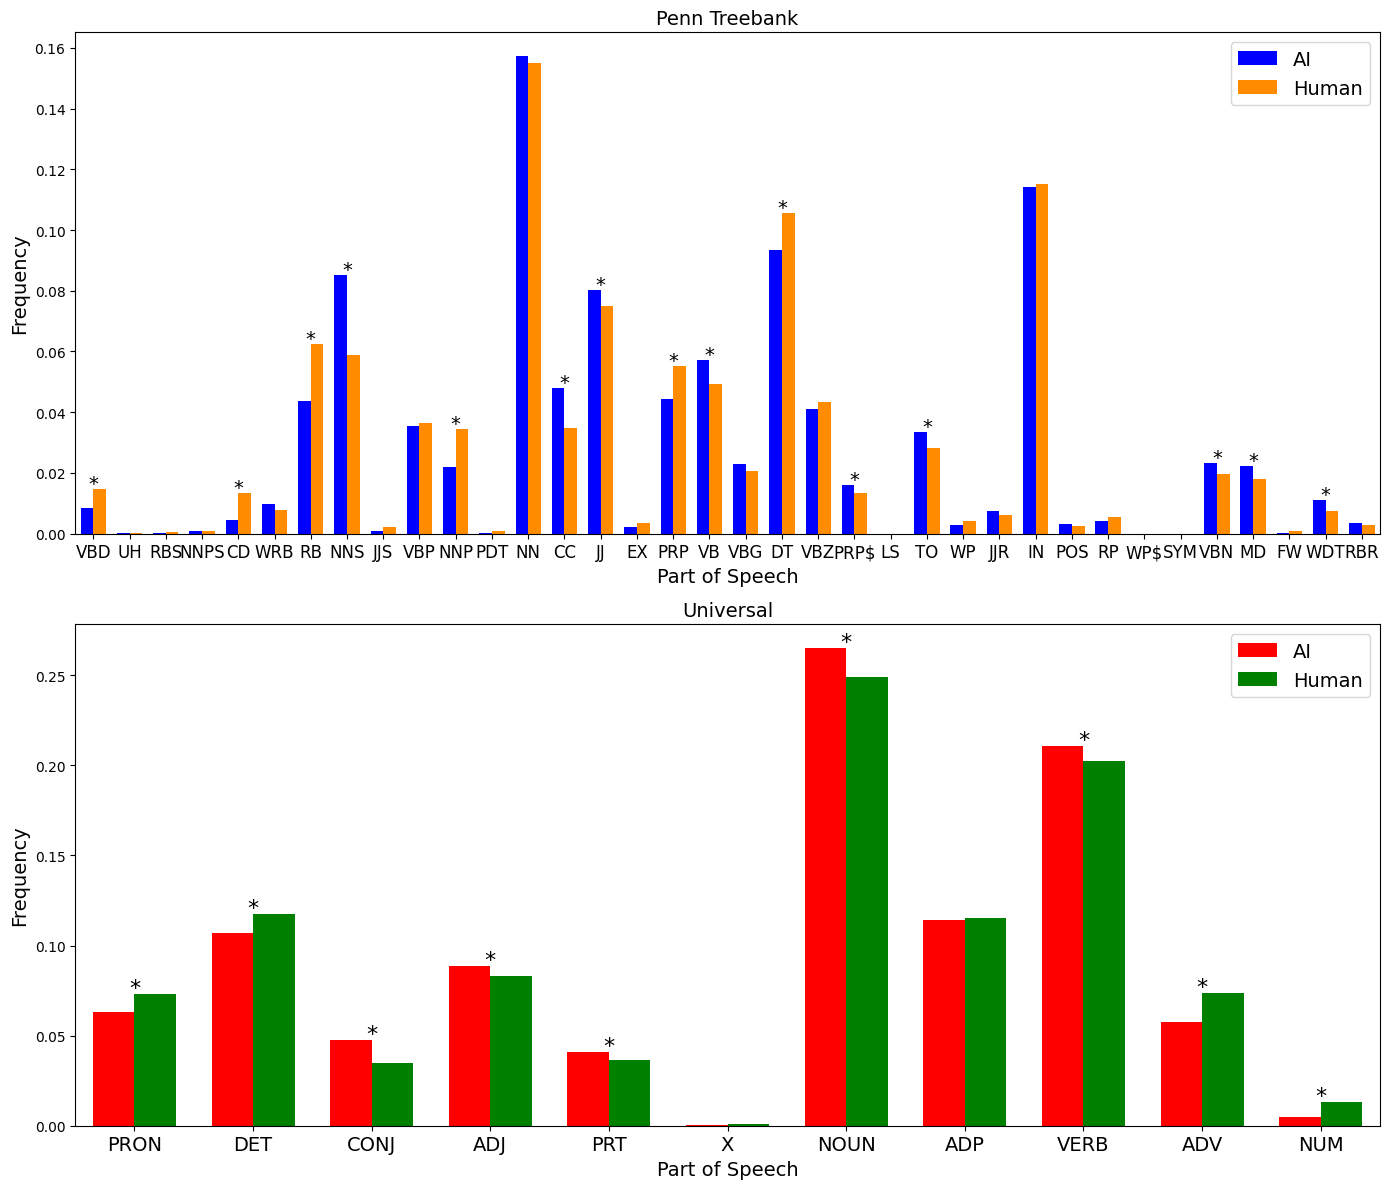

In [ ]:
#Plot relative frequency of each word


#funcitons to calculate significance of difference
def sig_penn(typ):
  try:
    total_proprotion = (plot[0].get(typ) + plot[1].get(typ)) / 2
    var = total_proprotion * (1- total_proprotion)
    std_err = np.sqrt(var * (1/aip[typ] + 1/hp[typ]))
    best_estimate = plot[0].get(typ) - plot[1].get(typ)
    test_stat = (best_estimate)/std_err
    pval = 2*dist.norm.cdf(-np.abs(test_stat))
    return pval
  except:
    return 1

def sig_univ(typ):
  try:
    total_proprotion = (plot[2].get(typ) + plot[3].get(typ)) / 2
    var = total_proprotion * (1- total_proprotion)
    std_err = np.sqrt(var * (1/aiu[typ] + 1/hu[typ]))
    best_estimate = plot[2].get(typ) - plot[3].get(typ)
    test_stat = (best_estimate)/std_err
    pval = 2*dist.norm.cdf(-np.abs(test_stat))
    return pval
  except:
    return 1

plot = []

for s in data:
  sort = sorted(s.items(), key=lambda i: i[0], reverse=False)
  vals = [b for (a,b) in sort]
  lbls = [a for (a,b) in sort]
  total_sum = sum(vals)
  rel_freq = [val/total_sum for val in vals]
  plot.append({lbls[i]:rel_freq[i] for i in range(len(lbls))})

x1 = list(set(plot[0].keys()) | set(plot[1].keys()))
d1 = []
d2 = []

for key in x1:
  d1.append(plot[0].get(key, 0))
  d2.append(plot[1].get(key, 0))

d3 = []
d4 = []
x2 = list(set(plot[2].keys()) | set(plot[3].keys()))
for key in x2:
  d3.append(plot[2].get(key, 0))
  d4.append(plot[3].get(key, 0))

bar_width = 0.35
x1_pos = np.arange(len(x1))
x2_pos = np.arange(len(x2))

# create a figure and a subplot
fig, (ax1, ax2) = plt.subplots(2,1, tight_layout=False, figsize=(14,12))

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['b', 'darkorange'])
ax1.set_prop_cycle(plt.rcParams['axes.prop_cycle'])

# create the bar plots for each group of data
b1 = ax1.bar(x1_pos - bar_width/2, d1, width=bar_width, align='center')
b2 = ax1.bar(x1_pos + bar_width/2, d2, width=bar_width, align='center')

# set the x-tick labels and axis limits
ax1.set_xticks(x1_pos)
ax1.set_xticklabels(x1, size=12)
ax1.set_xlim(-0.5, len(x1) - 0.5)

# add a legend
ax1.legend(['AI', 'Human'], fontsize=14)
ax1.set_title('Penn Treebank', size=14)

# set the axis labels
ax1.set_xlabel('Part of Speech',size=14)
ax1.set_ylabel('Frequency', size=14)

for i, (b1, b2) in enumerate(zip(b1, b2)):
  if sig_penn(x1[i]) < 0.05:
    height = max(b1.get_height(), b2.get_height())
    ax1.annotate('*', xy=(x1_pos[i], height), ha="center", size=14)


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['r', 'g'])
ax2.set_prop_cycle(plt.rcParams['axes.prop_cycle'])

b3 = ax2.bar(x2_pos - bar_width/2, d3, width=bar_width, align='center')
b4 = ax2.bar(x2_pos + bar_width/2, d4, width=bar_width, align='center')

for i, (b1, b2) in enumerate(zip(b3, b4)):
  if sig_univ(x2[i]) < 0.05:
    height = max(b1.get_height(), b2.get_height())
    ax2.annotate('*', xy=(x2_pos[i], height), ha="center", size=16)

# set the x-tick labels and axis limits
ax2.set_xticks(x2_pos)
ax2.set_xticklabels(x2,size=14)
ax2.set_xlim(-0.5, len(x2) - 0.5)

# add a legend
ax2.legend(['AI', 'Human'], fontsize=14)
ax2.set_title('Universal', size=14)

# set the axis labels
ax2.set_xlabel('Part of Speech',size=14)
ax2.set_ylabel('Frequency',size=14)




We can see there are some differences between the AI and a human. There is some variation in the types of nouns used (plural). Put the other primary difference we see in both is that humans use slightly more determiners. 

Using a population proportion test, we get that many POS are statistically different (p<0.05), indicated by a star. This suggests that POS may actually be a useful discriminator.

We now want to test if the POS bigrams and trigrams are different, i.e. does the POS sequencing differ between the Chat-GPT and people

In [ ]:
from nltk.lm import MLE
import math

#Create data set, do not flatten so each sentence padded separetely
rmv_list = [".", ",", "$", "''", "``", ")", "(", ":", "#"]
ai_just_tags_p = [[b for (a,b) in l if b not in rmv_list] for l in ai_tagged_penn]
human_just_tags_p = [[b for (a,b) in l if b not in rmv_list] for l in human_tagged_penn]
ai_just_tags_u = [[b for (a,b) in l if b not in rmv_list] for l in ai_tagged_univ]
human_just_tags_u = [[b for (a,b) in l if b not in rmv_list] for l in human_tagged_univ]

# print(ai_just_tags_p[:109])


#generate 3, 2, 1grams for all data with padding
train_ai_penn, vocab_ai_penn = nltk.lm.preprocessing.padded_everygram_pipeline(3, ai_just_tags_p[:math.ceil(0.8 * len(ai_just_tags_p))])
train_human_penn, vocab_human_penn = nltk.lm.preprocessing.padded_everygram_pipeline(3, human_just_tags_p[:math.ceil(0.8 * len(human_just_tags_p))])

train_ai_univ, vocab_ai_univ = nltk.lm.preprocessing.padded_everygram_pipeline(3, ai_just_tags_u[:math.ceil(0.8 * len(ai_just_tags_u))])
train_human_univ, vocab_human_univ = nltk.lm.preprocessing.padded_everygram_pipeline(3, human_just_tags_u[:math.ceil(0.8 * len(human_just_tags_u))])

#Train models
lm_ai_penn = MLE(3)
lm_ai_penn.fit(train_ai_penn, vocab_ai_penn)

lm_human_penn = MLE(3)
lm_human_penn.fit(train_human_penn, vocab_human_penn)

lm_ai_univ = MLE(3)
lm_ai_univ.fit(train_ai_univ, vocab_ai_univ)

lm_human_univ = MLE(3)
lm_human_univ.fit(train_human_univ, vocab_human_univ)

In [1]:
from nltk.lm.preprocessing import pad_both_ends

#Score teh model by giving it all the testing data and assinign to the model with the lower cost
#Count all correct and incorrect and compute statistics
#for penn treebank
#Also record errors
#assume padding of two
def score(sent, model):
  score = 0
  for i in range(2, len(sent)):
    score += (-model.logscore(sent[i], sent[i-2:i]))
  return score

TP, FP, TN, FN = 0,0,0,0

#we define positive as AI for the sake of the confusion matrix
#AI - Human
# diff = []
# #AI = 1, HUman = 0
# typ = []
# right = []

for s in ai_just_tags_p[math.ceil(0.8 * len(ai_just_tags_p)):]:
  s = list(pad_both_ends(s, n=3))
  AIscore = score(s, lm_ai_penn)
  Hscore = score(s, lm_human_penn)
  # diff.append((AIscore - Hscore)/(AIscore+Hscore))
  # typ.append(1)
  if AIscore < Hscore:
    TP += 1
    # right.append(1)
  else:
    FN += 1
    # right.append(0)

for s in human_just_tags_p[math.ceil(0.8 * len(human_just_tags_p)):]:
  s = list(pad_both_ends(s, n=3))
  AIscore = score(s, lm_ai_penn)
  Hscore = score(s, lm_human_penn)
  # diff.append((AIscore - Hscore)/(AIscore+Hscore))
  # typ.append(0)
  if Hscore < AIscore:
    TN += 1
    # right.append(1)
  else:
    FP += 1
    # right.append(0)

sensitivity = TP/(TP + FN)
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(TP, FP, TN, FN, sensitivity, precision, accuracy)

NameError: ignored

In [ ]:
TP, FP, TN, FN = 0,0,0,0

#Do the same for the universal tagset
#AI - Human
diff = []
#AI = 1, Human = 0
typ = [] 
#if it was classified correctly
right = []

#Store perplexities of AI model
AI_got_perp = []
AI_fail_perp = []
Human_got_perp = []
Human_fail_perp = []


#we define positive as AI for the sake of the confusion matrix

for s in ai_just_tags_u[math.ceil(0.8 * len(ai_just_tags_u)):]:
  s = list(pad_both_ends(s, n=3))
  AIscore = score(s, lm_ai_univ)
  Hscore = score(s, lm_human_univ)
  try:
    diff.append(abs((AIscore - Hscore)/(AIscore + Hscore)))
    typ.append(1)
    if AIscore < Hscore:
      TP += 1
      right.append(1)
      AI_got_perp.append(lm_ai_univ.perplexity(trigrams(s)))
    else:
      FN += 1
      right.append(0)
      AI_fail_perp.append(lm_ai_univ.perplexity(trigrams(s)))
  except:
    pass
    # print(s, AIscore, Hscore)
  

for s in human_just_tags_u[math.ceil(0.8 * len(human_just_tags_u)):]:
  s = list(pad_both_ends(s, n=3))
  AIscore = score(s, lm_ai_univ)
  Hscore = score(s, lm_human_univ)
  try:
    diff.append(abs((AIscore - Hscore)/(AIscore+Hscore)))
    typ.append(0)
    if Hscore < AIscore:
      TN += 1
      right.append(1)
      Human_got_perp.append(lm_human_univ.perplexity(trigrams(s)))
    else:
      FP += 1
      right.append(0)
      Human_fail_perp.append(lm_human_univ.perplexity(trigrams(s)))
  except:
    pass
    # print(s, AIscore, Hscore)

sensitivity = TP/(TP + FN)
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(TP, FP, TN, FN, sensitivity, precision, accuracy)

2779 671 2662 527 0.8405928614640048 0.8055072463768116 0.8195511372194607


We trained a trigram MLE model with fallthrough (basic NLTK system) on our data, using 80% of it, then tested it using the other 20%. From this we classified AI as a positive and human as negative. With an expanded tag set, we got about 70% precision and acurracy, while the reduce tag set got up to 80%, likely from fewer, more common tags with more significant difference. While this is not enough to accurately classify the data, it provides a very useful classification technique, and shows that the sentences produced are actually different between the AI and human responses, and it can provide some insight into classificaiton. 

Text(0, 0.5, 'Count')

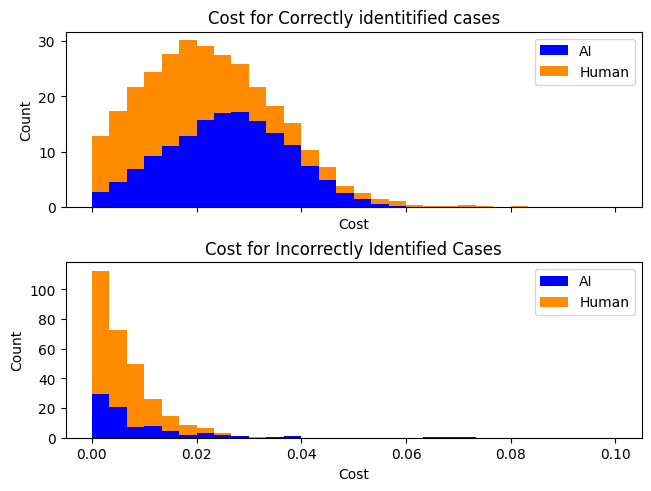

In [ ]:
#Plot differences in cost

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

rightAI = []
rightHuman = []
wrongAI = []
wrongHuman = []

for i in range(0, len(diff)):
  if typ[i] == 1: #AI is correct
    if right[i] == 1:
      rightAI.append(diff[i])
    else:
      wrongAI.append(diff[i])
  else: #human
    if right[i] == 1:
      rightHuman.append(diff[i])
    else:
      wrongHuman.append(diff[i])

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['b', 'darkorange'])
#fig.suptitle("Cost Ratio for Selecting classes")

ax1.set_prop_cycle(plt.rcParams['axes.prop_cycle'])

#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['r', 'g'])
ax2.set_prop_cycle(plt.rcParams['axes.prop_cycle'])

ax1.hist([rightAI, rightHuman], label=['AI', 'Human'], density=True, histtype='bar', stacked=True, bins=30, range=(0,0.1))
ax1.set_title('Cost for Correctly identitified cases')
ax1.legend()

ax2.hist([wrongAI, wrongHuman], label=['AI', 'Human'], density=True, histtype='bar', stacked=True, bins=30, range=(0,0.1))
ax2.set_title('Cost for Incorrectly Identified Cases')
ax2.legend()

ax1.set_xlabel('Cost')
ax1.set_ylabel('Count')


ax2.set_xlabel('Cost')
ax2.set_ylabel('Count')

This graph shows the cost ratio (AI-Human)/(AI+Human) that was used to make the decision. Ultimately it shows how different the two costs are, normalized to the total cost. We see that for correclty identified cases, we get some cases with larger separation, while for incorrect cases, most tend ot be close. However, none of the cases have that extreme a difference. This means that while our model correclty predicts/identified the source of the model, it is frequently pretty close.

https://nlp.fi.muni.cz/raslan/2011/paper17.pdf
Clustering does not make sense for POS, given that POS is a somewhat context deremind thing. Only so many sequences are valid, so it makes lense sense for short things

I want to model how uniform the speach is

Perplexity, want AI model low perplexity
https://seo.ai/blog/ai-content-detection

Perplexity, we track the perplexity of the model looking at previously seen AI data nad human data

Any better way to do perplexity and quantify buristiness

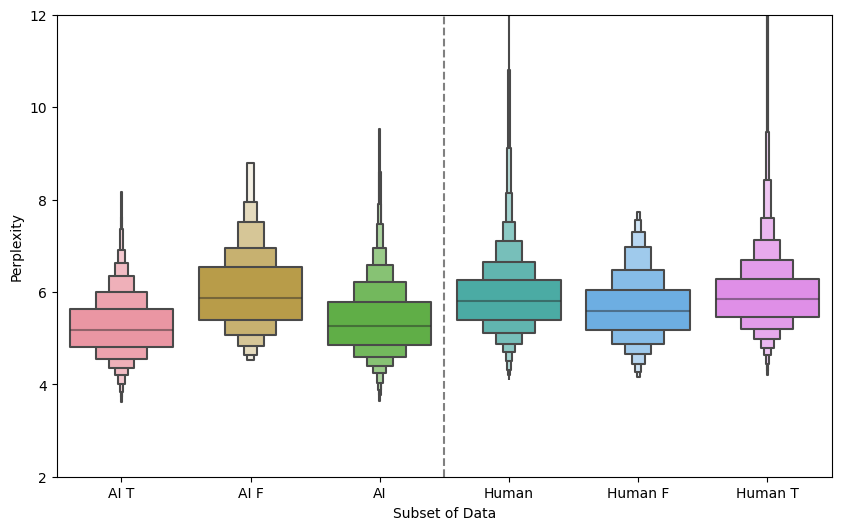

In [ ]:
#Plot perplexities

fig, ax = plt.subplots(1,1,figsize=(10,6))

AI_got_perp = [x for x in AI_got_perp if x != float("inf")]
AI_fail_perp = [x for x in AI_fail_perp if x != float("inf")]
Human_got_perp = [x for x in Human_got_perp if x != float("inf")]
Human_fail_perp = [x for x in Human_fail_perp if x != float("inf")]

bp1 = sns.boxenplot(ax = ax, data = [AI_got_perp, AI_fail_perp, AI_got_perp+AI_fail_perp, Human_got_perp + Human_fail_perp, Human_fail_perp, Human_got_perp], showfliers=False);
#bp2 = sns.boxenplot(ax = ax[1], data = [AI_got_perp, AI_fail_perp, AI_got_perp+AI_fail_perp, Human_got_perp + Human_fail_perp, Human_fail_perp, Human_got_perp], showfliers=True);
ax.set_ylim(2,12)

labels = ["AI T", "AI F", "AI", "Human", "Human F", "Human T"]
ticks = list(range(0, len(labels)))

ax.axvline(x=2.5, linestyle='--', color='gray')

ax.set_ylabel('Perplexity')
ax.set_xlabel('Subset of Data')
#ax[1].axvline(x=2.5, linestyle='--', color='gray')

#ax.set_title("Perplexities with outliers hidden")
#ax[1].set_title("Perplexities with outliers ")

bp1.set_xticks(ticks, labels)
#bp2.set_xticks(ticks, labels)

In [ ]:
from statistics import mean, stdev

#Ztest for how different these are
meandiff = mean(AI_got_perp+AI_fail_perp) - mean(Human_got_perp + Human_fail_perp)
denom = math.sqrt(pow(stdev(AI_got_perp+AI_fail_perp),2) + pow(stdev(AI_got_perp+AI_fail_perp), 2))
print(meandiff / denom)

mAI = mean(AI_got_perp) - mean(AI_fail_perp)
denom = math.sqrt(pow(stdev(AI_got_perp), 2) + pow(stdev(AI_fail_perp), 2))
print(mAI / denom)
  

-0.3936676915955852
-0.4482872767856115


This plot shows how perplexed our AI and human models are when they see new AI and human data respectively. The AI model is slightly (slightly) less perplexed, as we seen in teh combined data, and is more perplexed with examples that it incorrectly identifies. The human model is generally slightly more perplexed with less of that separation. This indicates that the AI model is slightly better at predicted AI data it has not seen before versus the human, suggesting that the AI data is slightly more patterned with POS. 

These perplexities are not siginficantly different

In [ ]:
#Creat HMM

from nltk.tag import hmm

#get the probability of an hmm of a tagger using internal methods because the HMM class is slightly wrong
def hmm_score(tagger, s):
  alpha = tagger._forward_probability(s)
  p = nltk.tag.hmm.logsumexp2(alpha[len(s) - 1])
  return -p

# trainer_ai = hmm.HiddenMarkovModelTrainer()
# print(ai_tagged_univ[5])
tagger_AI = nltk.HiddenMarkovModelTagger.train(ai_tagged_univ[math.ceil(0.8 * len(ai_tagged_univ)):])
tagger_Human = nltk.HiddenMarkovModelTagger.train(human_tagged_univ[math.ceil(0.8 * len(human_tagged_univ)):])

In [ ]:
#Test HMM the same way as before by assining to the class with lower cost, then computing 
# performance statistics, also record errors

TP, FP, TN, FN = 0,0,0,0

#AI - Human
diff = []
#AI = 1, Human = 0
typ = [] 
#if it was classified correctly
right = []

#we define positive as AI for the sake of the confusion matrix

for s in ai_tagged_univ[math.ceil(0.8 * len(ai_tagged_univ)):]:
  try:
    AIscore = hmm_score(tagger_AI, s)
    Hscore = hmm_score(tagger_Human, s)
    diff.append(abs((AIscore - Hscore)/(AIscore + Hscore)))
    typ.append(1)
    if AIscore < Hscore:
      TP += 1
      right.append(1)
    else:
      FN += 1
      right.append(0)
  except:
    print(s)
  

for s in human_tagged_univ[math.ceil(0.8 * len(human_tagged_univ)):]:
  try:
    AIscore = hmm_score(tagger_AI, s)
    Hscore = hmm_score(tagger_Human, s) 
    diff.append(abs((AIscore - Hscore)/(AIscore+Hscore)))
    typ.append(0)
    if Hscore < AIscore:
      TN += 1
      right.append(1)
    else:
      FP += 1
      right.append(0)
  except:
    print(s)

sensitivity = TP/(TP + FN)
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(TP, FP, TN, FN, sensitivity, precision, accuracy)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
3178 339 2984 127 0.9615733736762481 0.903611032129656 0.9296922148461074


Wow, the HMM hit 90%. So when we add in word usage (as shown by Josie they do have different word usages), we perform quite well!!

Text(0, 0.5, 'Count')

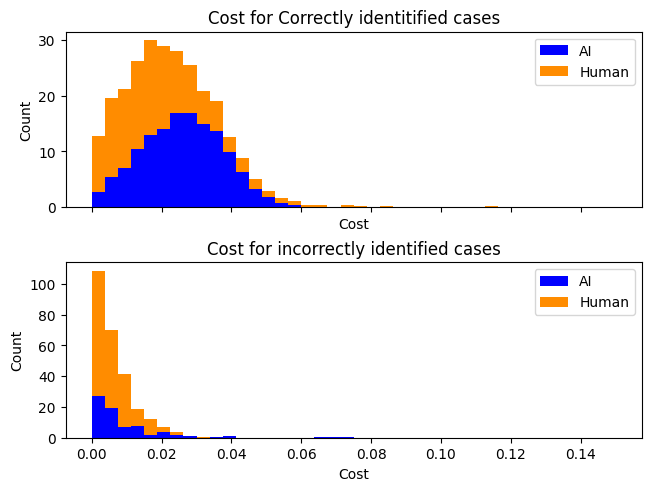

In [ ]:
#Plot HMM cost differences

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

rightAI = []
rightHuman = []
wrongAI = []
wrongHuman = []

for i in range(0, len(diff)):
  if typ[i] == 1: #AI is correct
    if right[i] == 1:
      rightAI.append(diff[i])
    else:
      wrongAI.append(diff[i])
  else: #human
    if right[i] == 1:
      rightHuman.append(diff[i])
    else:
      wrongHuman.append(diff[i])

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['b', 'darkorange'])
#fig.suptitle("Cost Ratio for Selecting classes")

ax1.set_prop_cycle(plt.rcParams['axes.prop_cycle'])

#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['r', 'g'])
ax2.set_prop_cycle(plt.rcParams['axes.prop_cycle'])

ax1.hist([rightAI, rightHuman], label=['AI', 'Human'], density=True, histtype='bar', stacked=True, bins=40, range=(0,0.15))
ax1.set_title('Cost for Correctly identitified cases')
ax1.legend()

ax2.hist([wrongAI, wrongHuman], label=['AI', 'Human'], density=True, histtype='bar', stacked=True, bins=40, range=(0,0.15))
ax2.set_title('Cost for incorrectly identified cases')
ax2.legend()

ax1.set_xlabel('Cost')
ax1.set_ylabel('Count')


ax2.set_xlabel('Cost')
ax2.set_ylabel('Count')

Additionally when we plot the cost differece, we see a distribution shifted even further left. This mean that the HMM is more confident in its decisions when it is correct, and not that confident when it is incorrect. This is suggestive of a much more accurate model fo rprediction HMM

I can apply entropy to this, but I think it has much less meaning.


Here we compute how the frequency of certain ngram patterns varies between the data sets

In [ ]:
#Record the distance between a word and its last occurance using the dictinoary

def calculate_last_pos(text, word_dist, last_pos, word_count):
  for i, w in enumerate(text):
    word_count[w] += 1
    if last_pos[w] == None:
      last_pos[w] = i
    else:
      word_dist[w].append(i - last_pos[w])
      last_pos[w] = i

from statistics import mean, stdev

#Z test to compare two distributinos
def ztest(word, ai_dist, human_dist):
  try:
    meanai = mean(ai_dist[word])
    meanhuman = mean(human_dist[word])
    meandif = mean(ai_dist[word]) - mean(human_dist[word])
    denom = math.sqrt(pow(stdev(ai_dist[word]),2) + pow(stdev(human_dist[word]), 2))
    return meandif / denom
  except: 
    return 0 #fail say no difference
  

In [ ]:
#Code to plot the frequency distributions for POS ngrams

from nltk.lm.preprocessing import pad_both_ends
from nltk.util import ngrams

def plot_ngram_ferq_diff(n, axis1, axis2, ai_data, human_data):
  rmv_list = [".", ",", "$", "''", "``", ")", "(", ":", "#"]

  #clean the data
  ai_data = [[t for (w,t) in s if t not in rmv_list] for s in ai_data]
  human_data = [[t for (w,t) in s if t not in rmv_list] for s in human_data]

  ai_ngrams = flatten([ngrams(s, n, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>') for s in ai_data])
  human_ngrams = flatten([ngrams(s, n, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>') for s in human_data])

  ai_dist = defaultdict(lambda : [])
  human_dist = defaultdict(lambda : [])

  ai_last_pos = defaultdict(lambda : None)
  human_last_pos = defaultdict(lambda : None)

  ai_counts = defaultdict(lambda:0)
  human_counts = defaultdict(lambda :0)

  #calculate the position distributions
  calculate_last_pos(ai_ngrams, ai_dist, ai_last_pos, ai_counts)
  calculate_last_pos(human_ngrams, human_dist, human_last_pos, human_counts)

  # ai_most = sorted(ai_counts.items(), key=lambda x: x[1], reverse=True)
  # human_most = sorted(human_counts.items(), key=lambda x: x[1], reverse=True)

  #Take the data to plot as any ngram that occurs more than 20 times in each data set
  typs = set([a for a,b in human_counts.items() if b >= 20]).intersection(set([a for a,b in ai_counts.items() if b >= 20]))
  zstat = {typ:ztest(typ, ai_dist, human_dist) for typ in typs}
  zstat_most = sorted(zstat.items(), key= lambda x: abs(x[1]), reverse=True)

  ai_most_diff = {a:ai_dist[a] for (a,b) in zstat_most[:30]}
  human_most_diff = {a:human_dist[a] for (a,b) in zstat_most[:30]}

  #All the fun seaborn plotting, set up data frames then make violin plots
  df_ai = pd.DataFrame.from_dict(ai_most_diff, orient='index').transpose()
  df_ai_melted = df_ai.melt(var_name='word', value_name='count')
  df_ai_melted['class'] = 'AI'

  df_human = pd.DataFrame.from_dict(human_most_diff, orient='index').transpose()
  df_human_melted = df_human.melt(var_name='word', value_name='count')
  df_human_melted['class'] = 'human'

  df = pd.concat([df_ai_melted, df_human_melted])    

  splot = sns.violinplot(ax=axis1, data=df, y="word", x="count", hue='class', edgecolor=None, inner=None, linewidth=0.1, width=0.8, split=True, cut=0, gridsize=500, scale='count')
  # ax.set_xlim(0,3000)
  # splot.set(xscale='log')
  axis1.set_xlabel('Distribution of Distance Between POS '+ str(n) + "gram occurances")
  axis1.set_ylabel('POS subsequence')
  axis1.set_title("Most different " + str(n) + "gram Occurances Plots")
  axis1.set_yticklabels(axis1.get_yticklabels(), size=5)

  axis1.get_legend().set_title("")


  bp = sns.swarmplot(ax=axis2, data=zstat.values(), size=2.5)
  axis2.set_title(str(n) + "gram Z scores")
  bp.set_xticks([0], ['Z Score'])


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


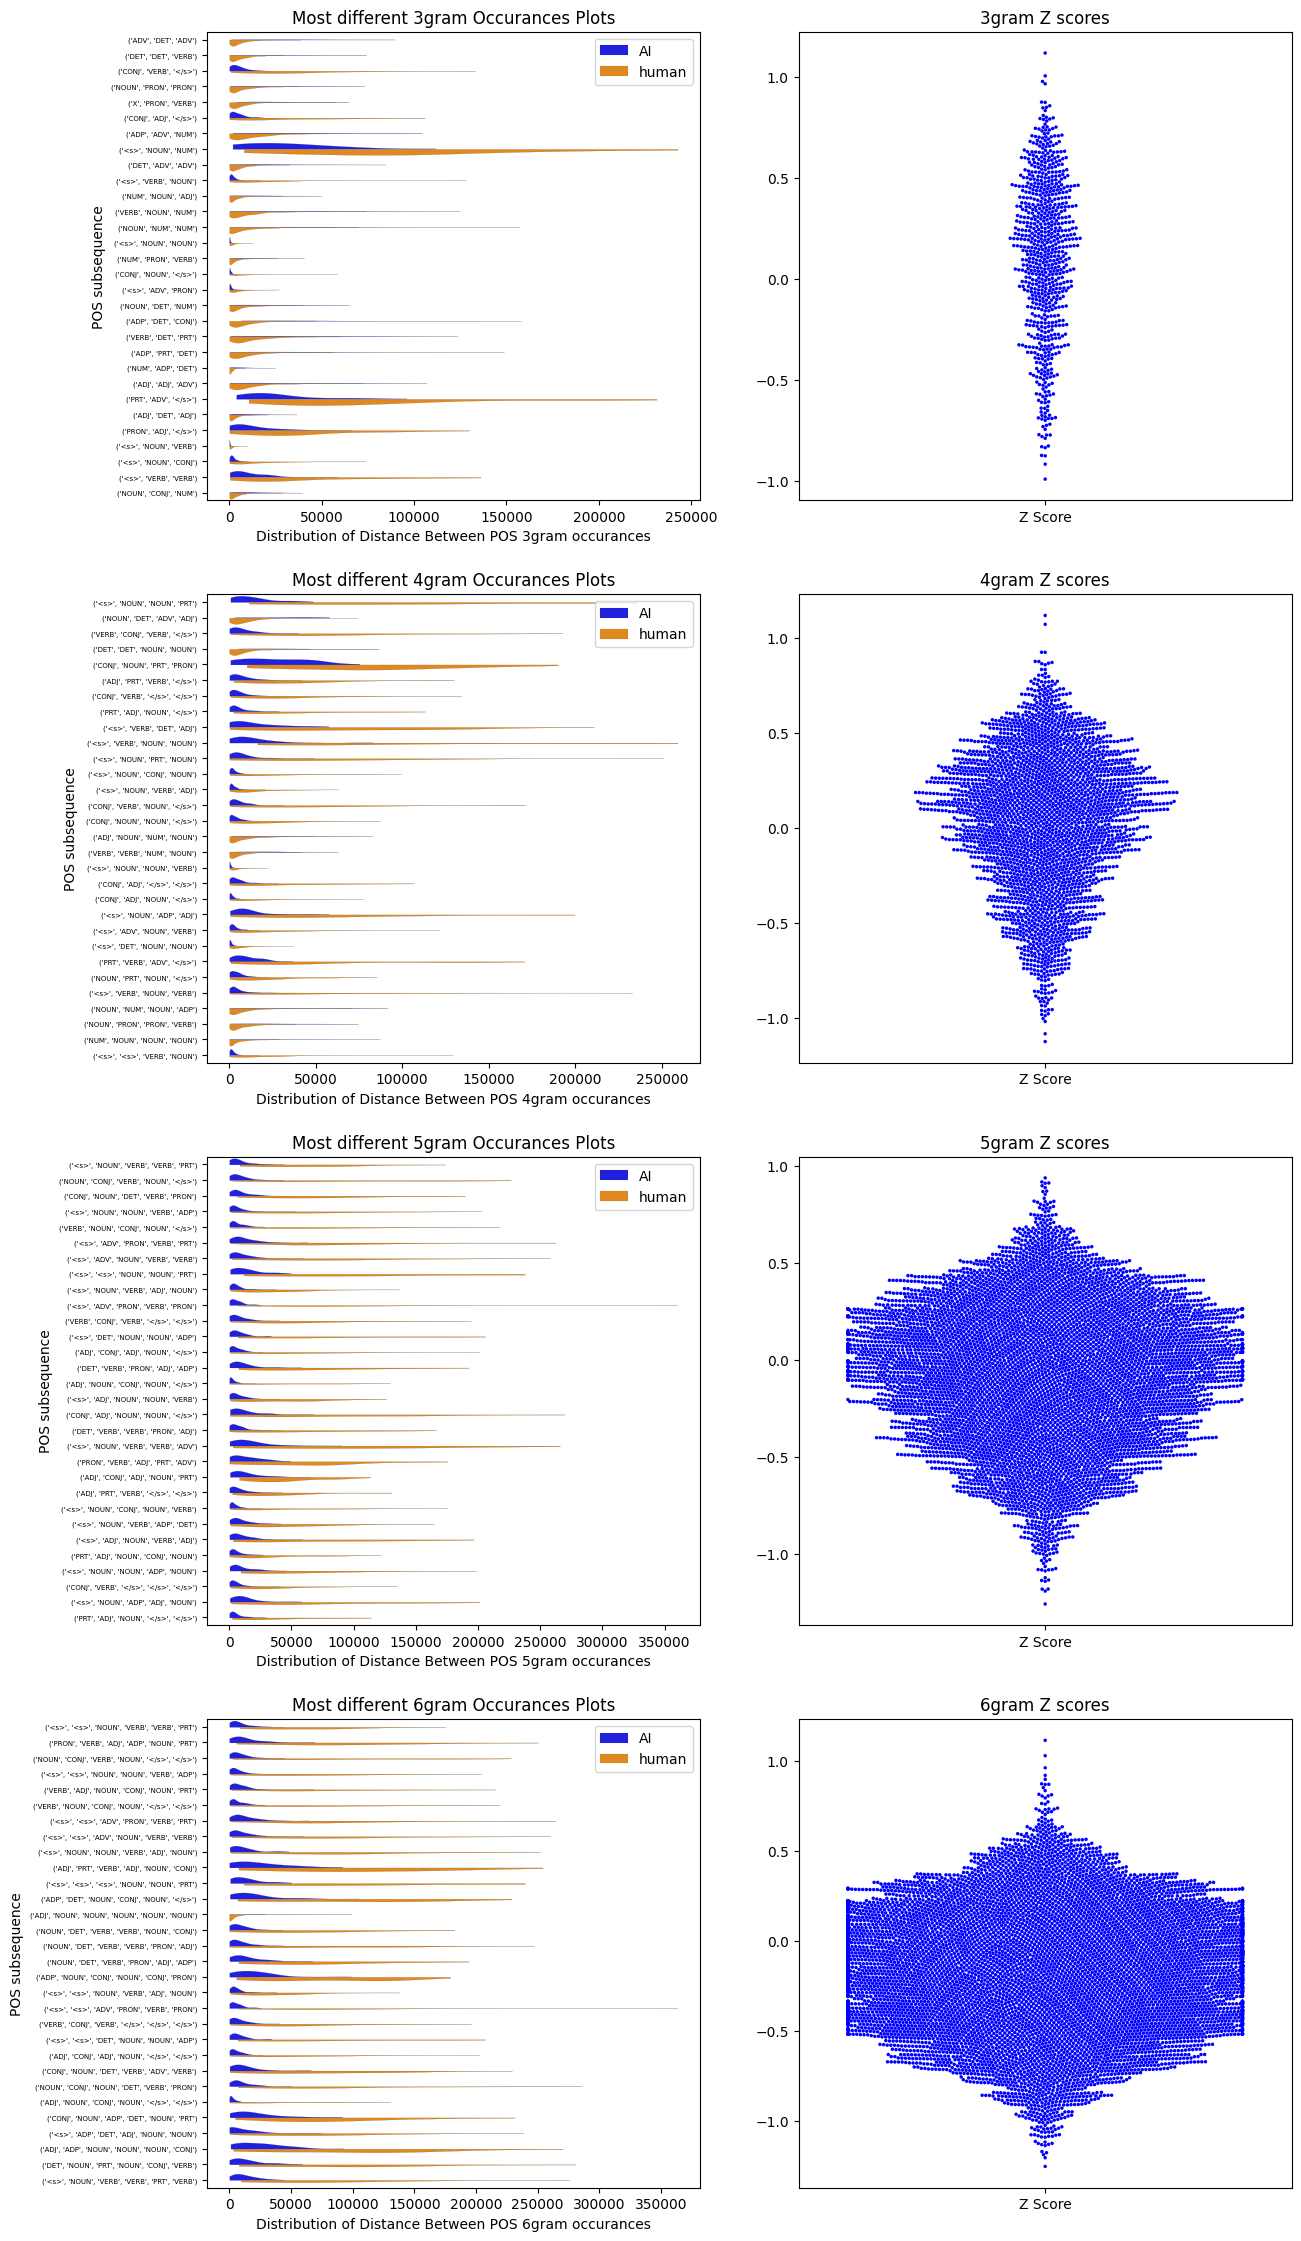

In [ ]:
#make plots

fig, axis = plt.subplots(4,2,figsize=(14,28))
# plot_ngram_ferq_diff(4, axis[0][0], axis[0][1], ai_tagged_penn, human_tagged_penn)
plot_ngram_ferq_diff(3, axis[0][0], axis[0][1], ai_tagged_univ, human_tagged_univ)
plot_ngram_ferq_diff(4, axis[1][0], axis[1][1], ai_tagged_univ, human_tagged_univ)
plot_ngram_ferq_diff(5, axis[2][0], axis[2][1], ai_tagged_univ, human_tagged_univ)
plot_ngram_ferq_diff(6, axis[3][0], axis[3][1], ai_tagged_univ, human_tagged_univ)

plt.show()

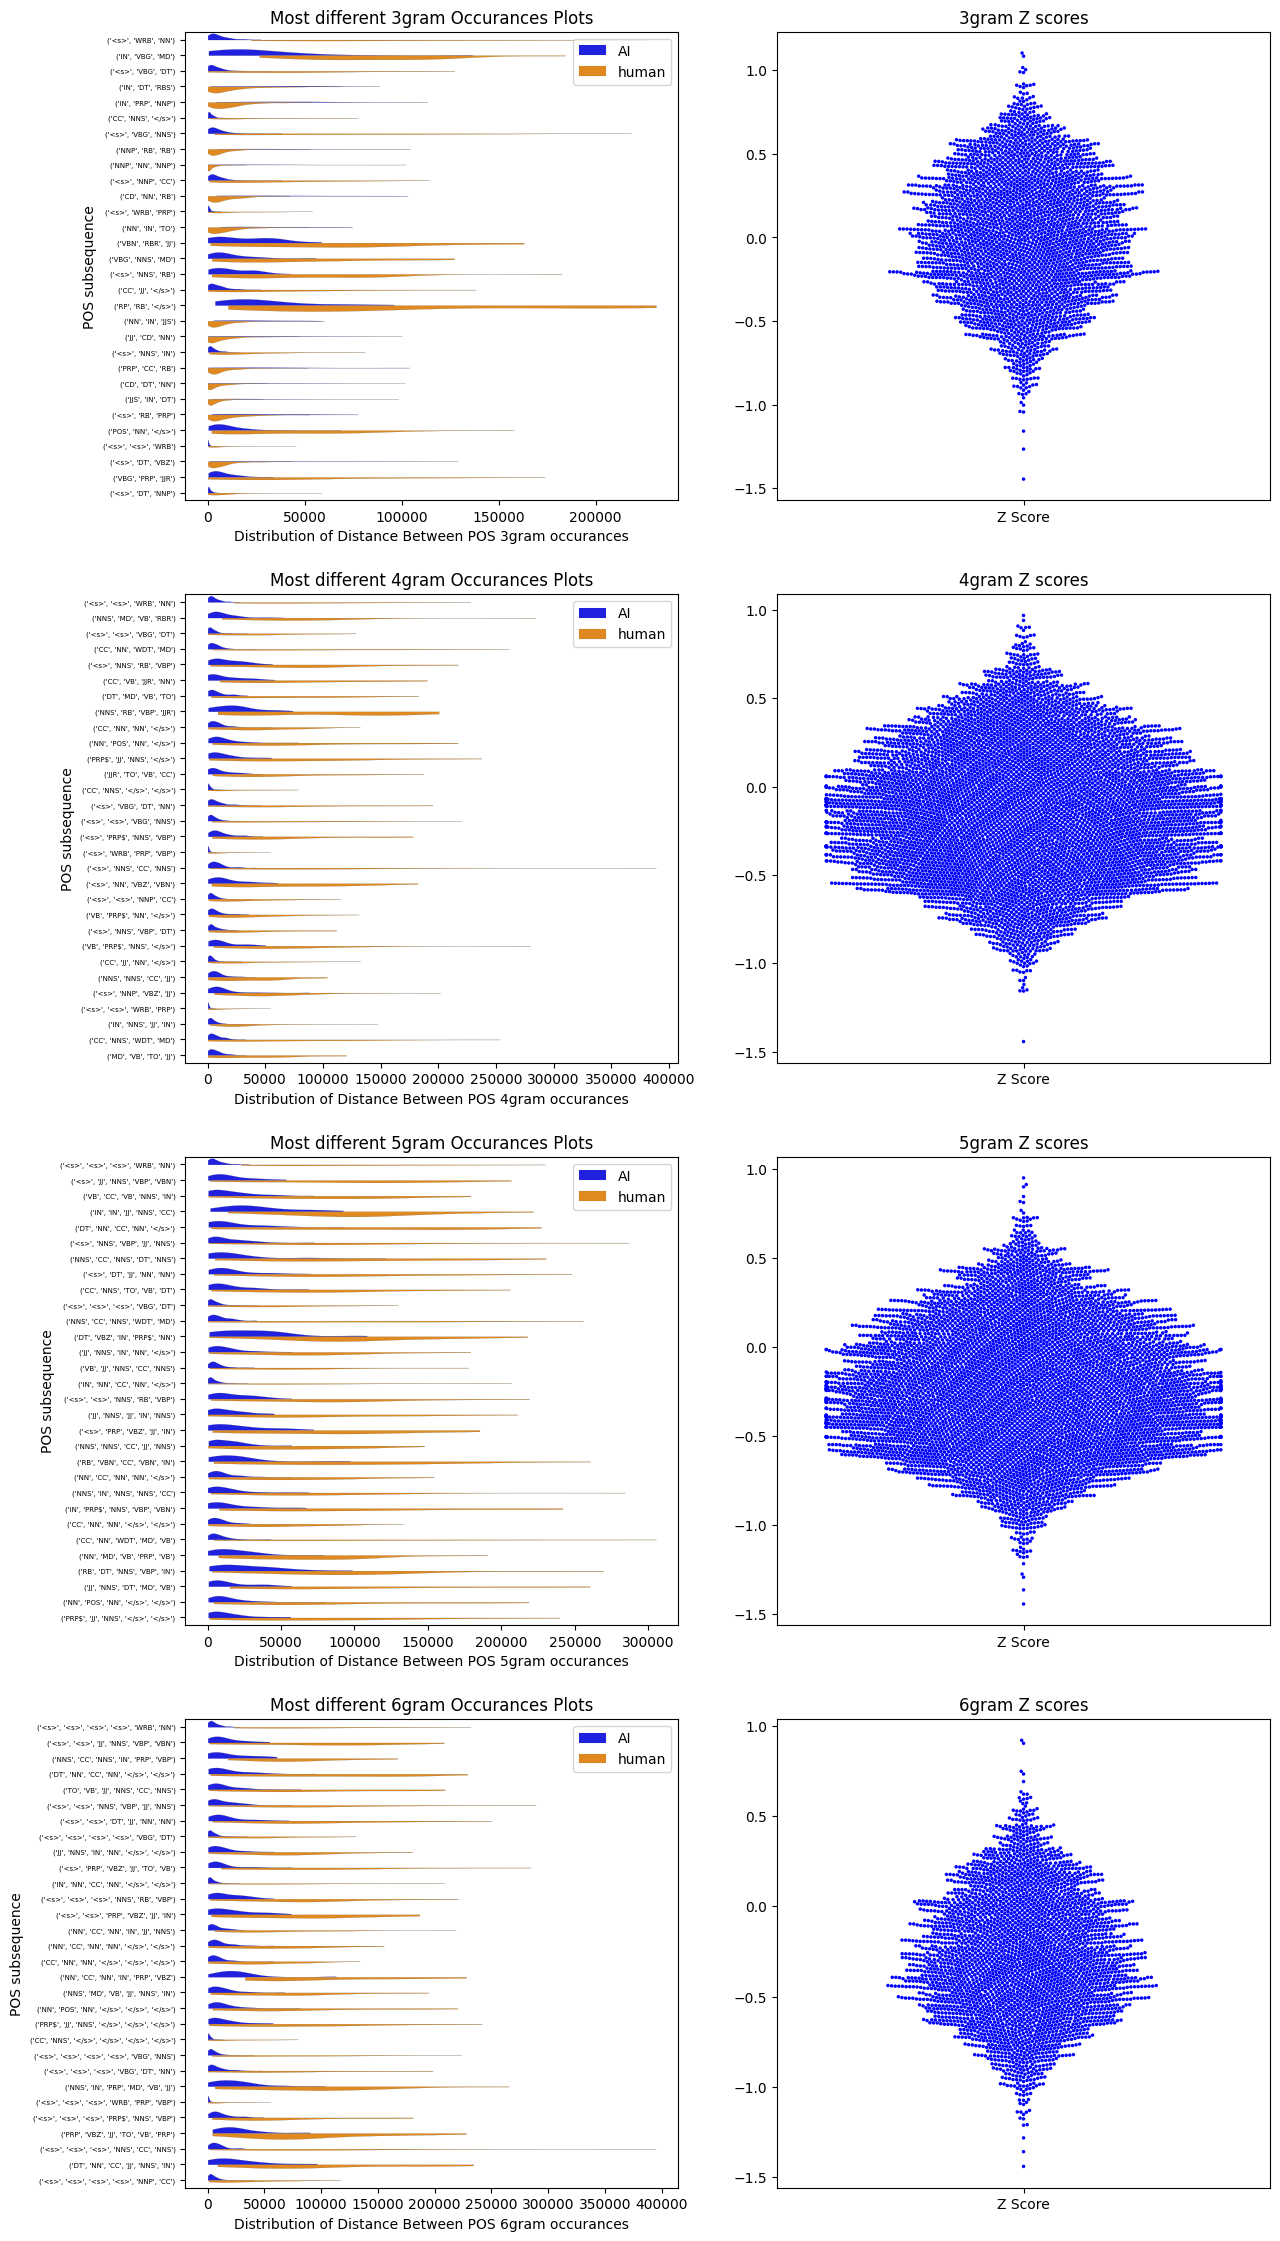

In [ ]:
fig, axis = plt.subplots(4,2,figsize=(14,28))
# plot_ngram_ferq_diff(4, axis[0][0], axis[0][1], ai_tagged_penn, human_tagged_penn)
plot_ngram_ferq_diff(3, axis[0][0], axis[0][1], ai_tagged_penn, human_tagged_penn)
plot_ngram_ferq_diff(4, axis[1][0], axis[1][1], ai_tagged_penn, human_tagged_penn)
plot_ngram_ferq_diff(5, axis[2][0], axis[2][1], ai_tagged_penn, human_tagged_penn)
plot_ngram_ferq_diff(6, axis[3][0], axis[3][1], ai_tagged_penn, human_tagged_penn)

plt.show()

Again, teh frequency of specefic phrases or ngrams is not different between the two data sets. This liley means that while AI and people use different phrasing, the difference is not significant enouhg to help with discrimination. Instead the overall phrasing or shorter parts matters more